## Support vector Machine :
Classification - classifying Wine Quality with respect to given features

#### Step 1:
Importing libraries to play with

In [85]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step 2:
Loading dataset

In [105]:
data = pd.read_csv('winequality-red-Copy1.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [87]:
#every feaure contain integer values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [88]:
#features = 12 , data = 1599
data.shape

(1599, 12)

In [106]:
#quality has these values and its number of values
quality = set(data['quality'])
quality
for i in quality:
    print('No. of {} in quality :{}'.format(i,data[data.quality== i].shape[0]))

No. of 3 in quality :10
No. of 4 in quality :53
No. of 5 in quality :681
No. of 6 in quality :638
No. of 7 in quality :199
No. of 8 in quality :18


#### Step 3:
next we shall create a new column called Review. This column will contain the values of 1,2, and 3.     
0 - Bad    
1 - Average
2 - Excellent     

In [138]:

reviews = []
for i in data['quality']:
    if i <= 4:
        reviews.append(0)
    elif i>=5 and i<=7:
        reviews.append(1)
    else:
        reviews.append(2)
        
data['Reviews'] = reviews
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [139]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### Step 4:
Splitting dataset into feature and target values

In [140]:
X = data.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Here Quality has a values of 3,4,5,6,7,8 ..I am going to change this to categorical values by taking another feature as ratings and change

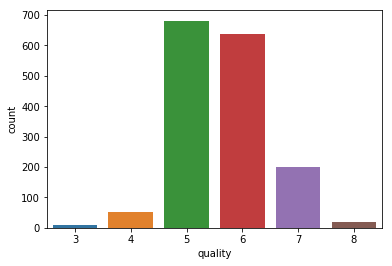

In [141]:
#plotting the histogram of the quality
import seaborn as sn
sn.countplot(x= 'quality',data = data)

In [142]:
help(sn.countplot)

Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or list 

In [143]:
y = data.iloc[:,-1].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Step 5:
standardizing features

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Step 6:
splitting dataset into training and testing

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#### Step 7:
fitting the dataset to the SVC model

In [146]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_default = SVC().fit(X_train,y_train)
#predicting with unseen data
y_pred = model_default.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for default SVC : ',accuracy)

Accuracy for default SVC :  0.984375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [147]:
#For linear
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_linear = SVC(kernel = 'linear').fit(X_train,y_train)
#predicting with unseen data
y_pred = model_linear.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for default SVC : ',accuracy)

Accuracy for default SVC :  1.0


In [148]:
#For polynomial
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_poly = SVC(kernel = 'poly').fit(X_train,y_train)
#predicting with unseen data
y_pred = model_poly.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for default SVC : ',accuracy)

Accuracy for default SVC :  0.99375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Step 8:
Using K-fold cross validationt to split the dataset

In [151]:
#for default model or rbf
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_default,X,y,cv=10,scoring = 'accuracy')
print(scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.97515528 0.97515528 0.98757764 1.         0.98125    0.99375
 0.99375    0.98125    1.         1.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [152]:
scores.mean()

0.9887888198757764

In [155]:
#for linear model 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_linear,X,y,cv=10,scoring = 'accuracy')
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [156]:
scores.mean()

1.0

In [157]:
#for linear model 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_poly,X,y,cv=10,scoring = 'accuracy')
print(scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.99378882 0.98757764 0.99378882 0.99375    0.98125    1.
 1.         0.99375    1.         1.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [158]:
scores.mean()

0.9943905279503106

#### Step 9:
finding C value and gamma

In [162]:
g_range = [0.0001,0.001,0.01,0.1,1,10,100]
accuracy_val = []
for g in g_range:
    svm = SVC(kernel = 'rbf',gamma=g)
    scores = cross_val_score(svm,X,y,cv=10,scoring='accuracy')
    accuracy_val.append(scores.mean())
accuracy_val

[0.9493690541709254,
 0.9493690541709254,
 0.9862691151033885,
 0.9869059084833713,
 0.9512440541709255,
 0.9493690541709254,
 0.9493690541709254]

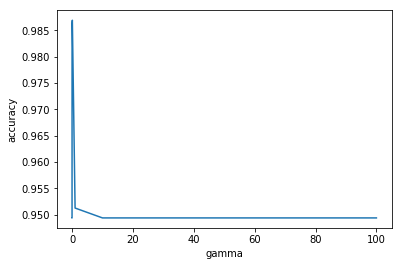

In [163]:
#plotting
plt.plot(g_range,accuracy_val)
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.show()

In [165]:
g_range = [0.00001,0.0001,0.001,0.01,0.1]
accuracy_val = []
for g in g_range:
    svm = SVC(kernel = 'rbf',gamma=g)
    scores = cross_val_score(svm,X,y,cv=10,scoring='accuracy')
    accuracy_val.append(scores.mean())
accuracy_val

[0.9493690541709254,
 0.9493690541709254,
 0.9493690541709254,
 0.9862691151033885,
 0.9869059084833713]

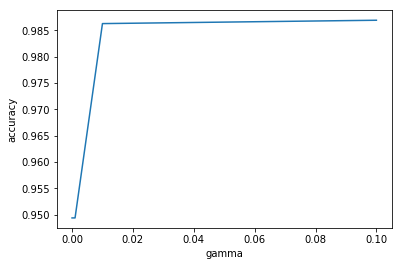

In [166]:
#plotting
plt.plot(g_range,accuracy_val)
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.show()

C=1,gamma = 0.01 is the best paramwter to model

In [169]:
svm_model = SVC(kernel = 'rbf',C=1.0,gamma = 0.01)
scores = cross_val_score(svm_model,X,y,cv=10,scoring='accuracy')
print(scores)

[0.97515528 0.98136646 0.98757764 0.9875     0.9875     0.9875
 0.98125    0.9875     0.99367089 0.99367089]


In [170]:
print(scores.mean())

0.9862691151033885


In [171]:
#BY using train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [173]:
svm_model = SVC(kernel = 'rbf',C=1.0,gamma = 0.01).fit(X_train,y_train)
y_pred = svm_model.predict(X_test)

In [174]:
print('accuracy : ',accuracy_score(y_test,y_pred))

accuracy :  0.9875


In [176]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [178]:
cm

array([[ 14,   0,   0],
       [  0, 302,   0],
       [  0,   4,   0]], dtype=int64)